In [226]:
from sklearn.manifold import TSNE
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings(action='ignore')

In [241]:
#Sample 생성

a = 2
rv1 = sp.stats.multivariate_normal([+a, +a], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+a, -a], [[1, 0], [0, 1]])
rv3 = sp.stats.multivariate_normal([-a, +a], [[1, 0], [0, 1]])
rv4 = sp.stats.multivariate_normal([-a, -a], [[1, 0], [0, 1]])

In [242]:
X0 = rv1.rvs(100)
X1 = rv2.rvs(100)
X2 = rv3.rvs(100)
X3 = rv4.rvs(100)

X = np.vstack([X0,X1,X2,X3])
Y = np.hstack([np.zeros(100), np.ones(100),np.ones(100)*2,np.ones(100)*3])

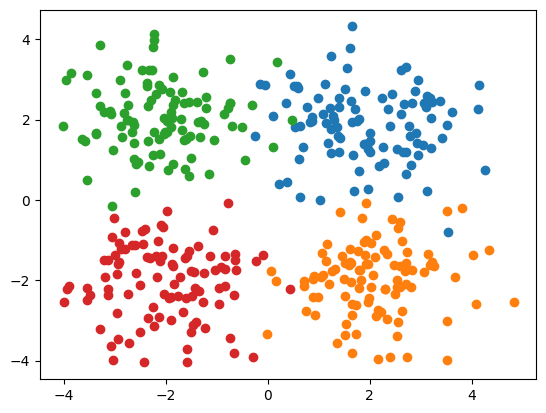

In [243]:
#Sample 시각화
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])

In [244]:
#Perplexity 설정 및 t-SNE 연산

n_perplexity = [1,2,3,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,125,150,175,200]
color = ['red','green','blue','orange']

X_t = np.zeros(shape=(len(n_perplexity),len(X),2))

for i in range(len(n_perplexity)):
    X_t[i] = TSNE(n_components=2,perplexity=n_perplexity[i],random_state=0).fit_transform(X)

In [254]:
for i in range(len(X_t)):
    X_t[i] = MinMaxScaler().fit_transform(X_t[i])

In [255]:
X_t0 = X_t[:,0:100,:]
X_t1 = X_t[:,100:200,:]
X_t2 = X_t[:,200:300,:]
X_t3 = X_t[:,300:400,:]

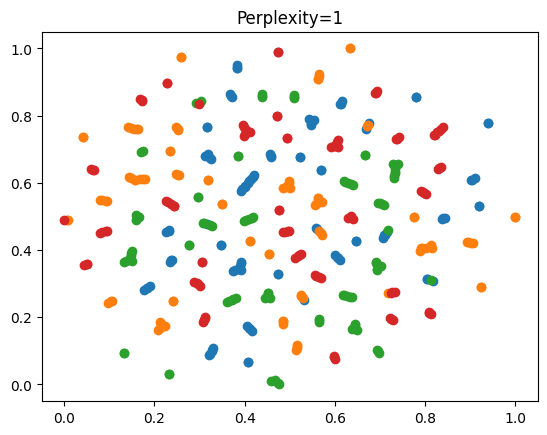

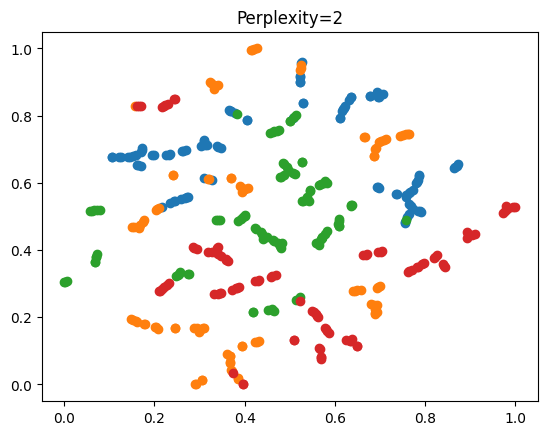

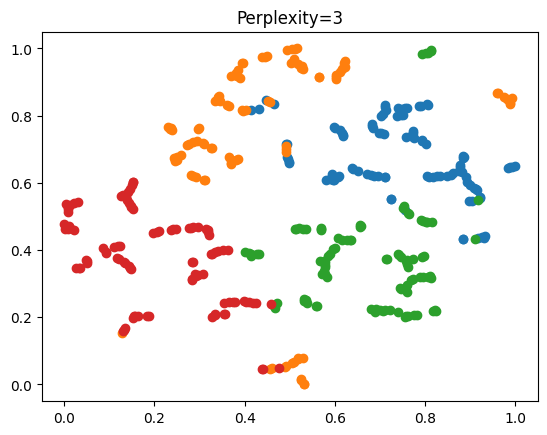

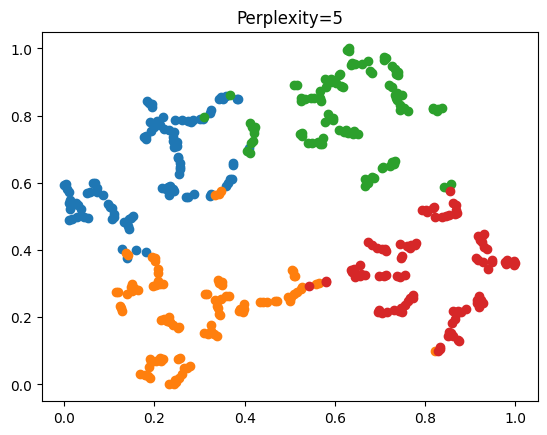

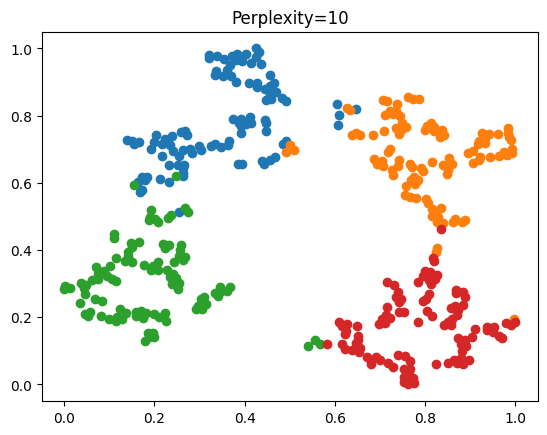

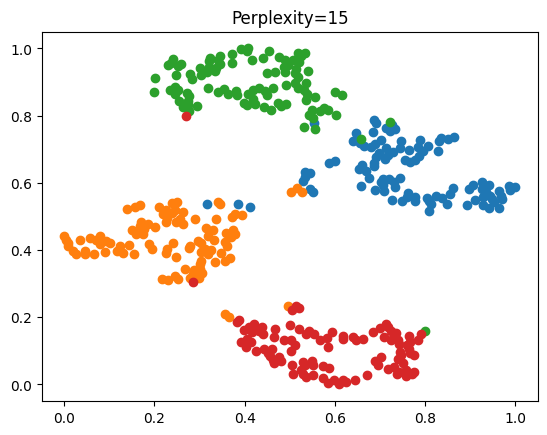

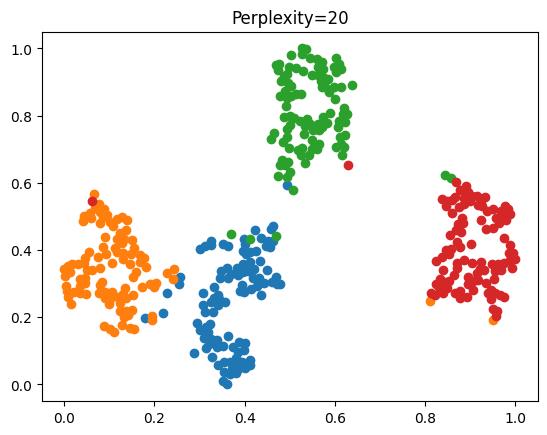

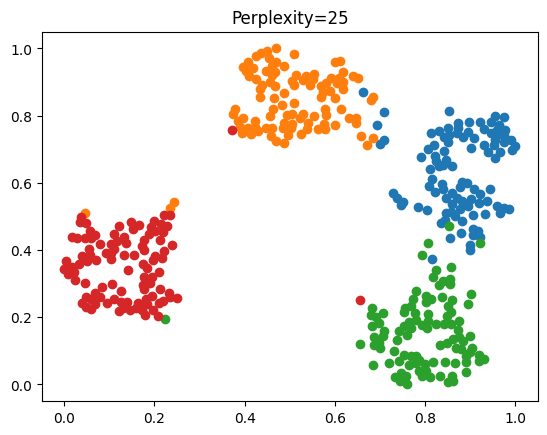

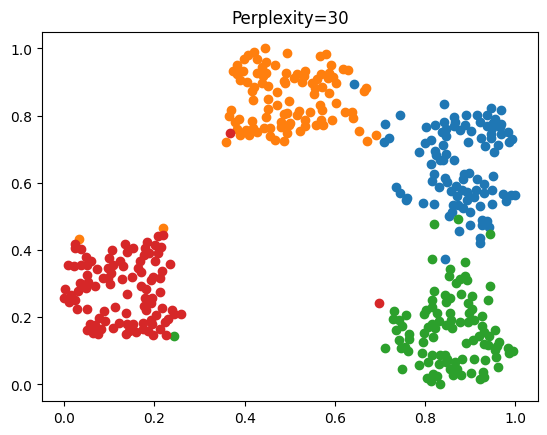

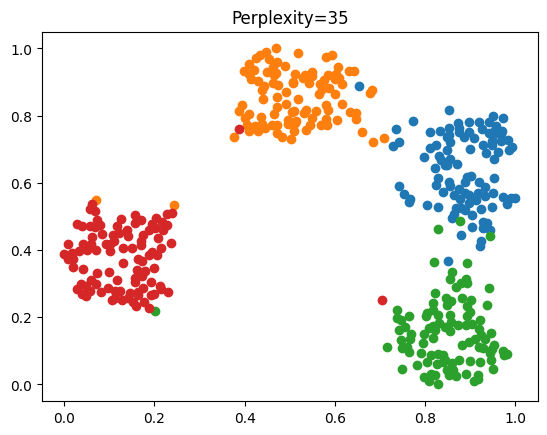

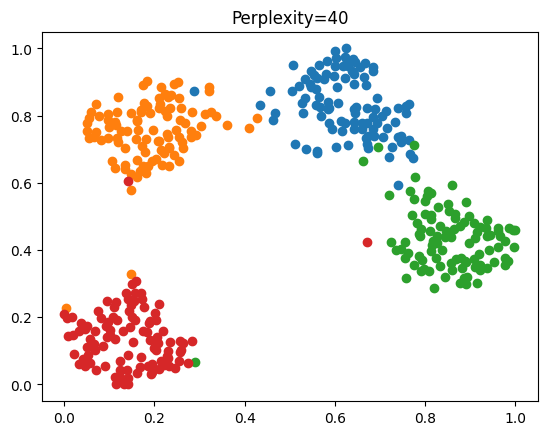

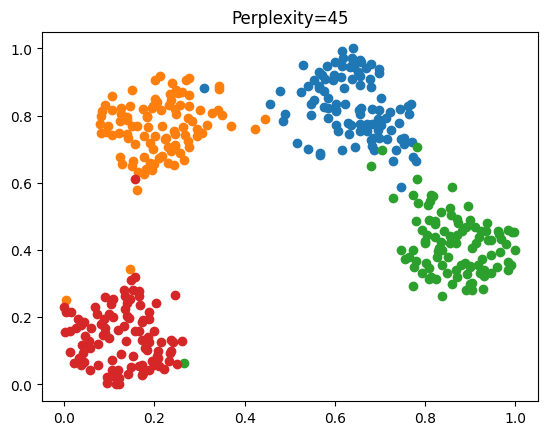

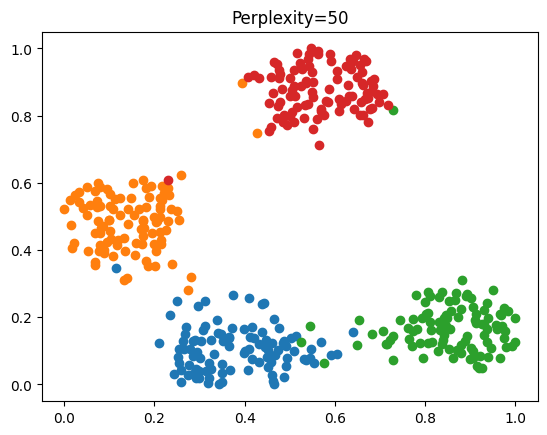

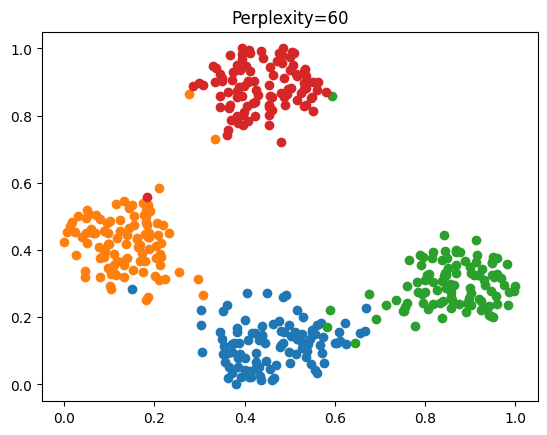

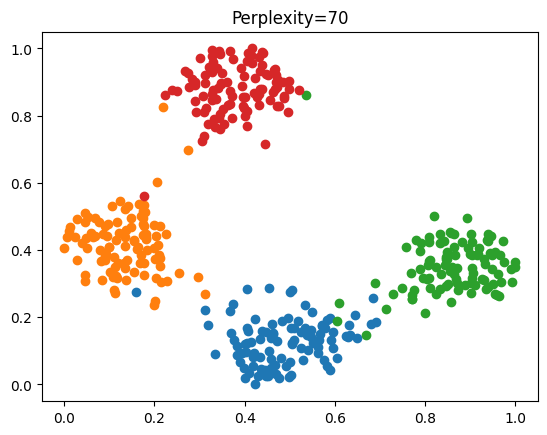

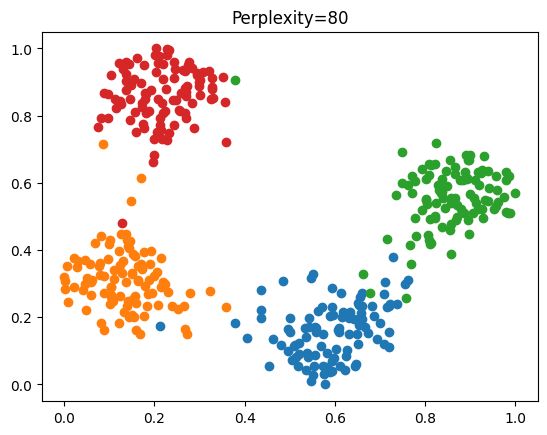

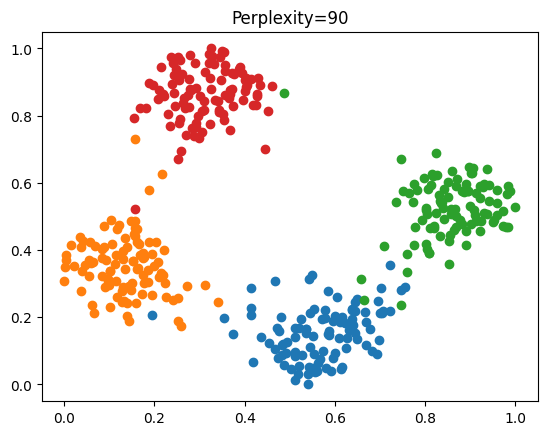

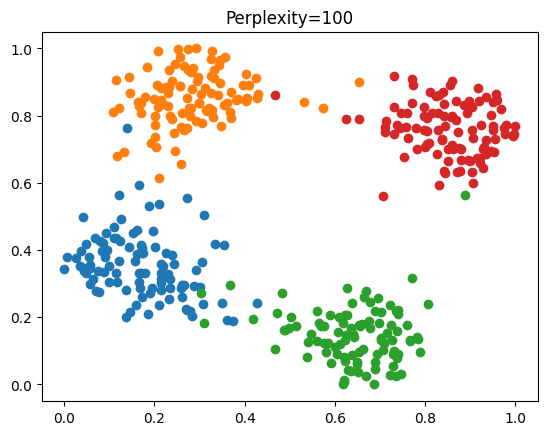

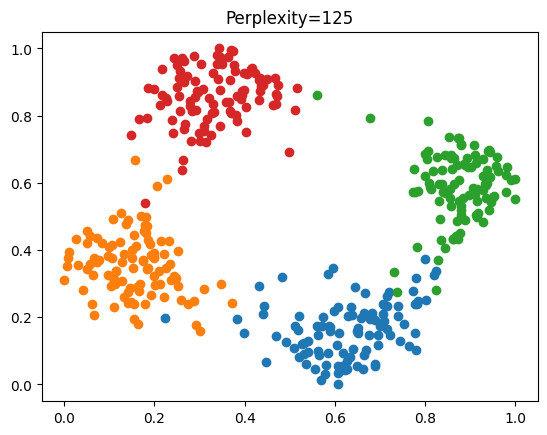

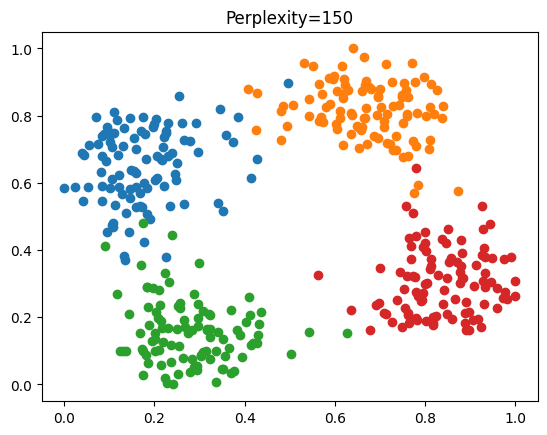

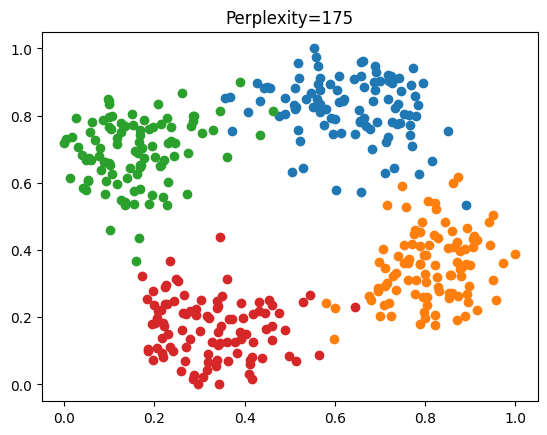

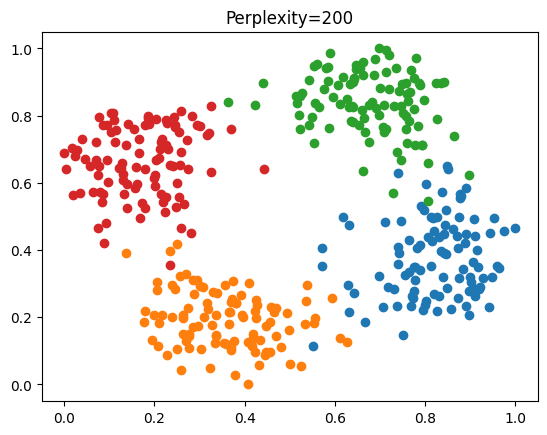

In [247]:
#t-SNE 결과 시각화
for i in range(len(n_perplexity)):
    plt.figure()
    plt.title(f'Perplexity={n_perplexity[i]}')
    plt.scatter(X_t0[i,:,0],X_t0[i,:,1])
    plt.scatter(X_t1[i,:,0],X_t1[i,:,1])
    plt.scatter(X_t2[i,:,0],X_t2[i,:,1])
    plt.scatter(X_t3[i,:,0],X_t3[i,:,1])

## Supplementary) Animate
Perplexity 값이 1부터 50까지 변화할때의 t-SNE 결과를 움직이는 그림을 통해 확인 할 수 있다.

In [230]:
from celluloid import Camera
from tqdm import tqdm

In [265]:
X_t = np.zeros(shape=(200, len(X), 2))

for i in tqdm(range(50)):
    X_t[i] = TSNE(n_components=2, perplexity=i+1, random_state=0).fit_transform(X)
for i in range(len(X_t)):
    X_t[i] = MinMaxScaler().fit_transform(X_t[i])
X_t0 = X_t[:, 0:100, :]
X_t1 = X_t[:, 100:200, :]
X_t2 = X_t[:, 200:300, :]
X_t3 = X_t[:, 300:400, :]

100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


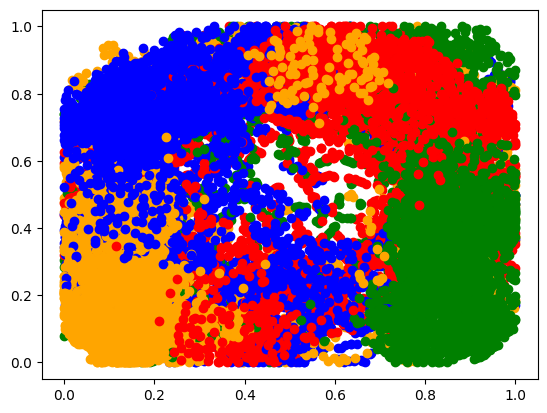

In [266]:
fig = plt.figure()

camera = Camera(fig)

for i in range(50):
    plt.scatter(X_t0[i,:,0],X_t0[i,:,1],color='red')
    plt.scatter(X_t1[i,:,0],X_t1[i,:,1],color='blue')
    plt.scatter(X_t2[i,:,0],X_t2[i,:,1],color='green')
    plt.scatter(X_t3[i,:,0],X_t3[i,:,1],color='orange')
    camera.snap()

In [267]:
animation = camera.animate(interval=500, blit=True)

In [268]:
animation.save(
    'perplexity.mp4',
    dpi=100,
    savefig_kwargs={
        'frameon': False,
        'pad_inches': 'tight'
    }
)